<a href="https://colab.research.google.com/github/Ishank2301/Comprehensive-ML-Handbook/blob/main/Benchmark_natural_language_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing

## Importing the libraries

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


## Importing the dataset

In [34]:
df = pd.read_csv('Restaurant_Reviews.tsv', delimiter= '\t', quoting = 3 )


## Cleaning the texts

In [35]:
import re # used to remove the stop words
import nltk # natural language processing Toolkit
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0,1000):
  review = re.sub('[^a-zA-Z]',' ',df['Review'][i])  # Removing all stopwords other than the a-z&A-Z
  # Convert all into lowercase
  review = review.lower()
  # Split the string data into characters ["i am groot"] -> ["i","am","groot"]
  review = review.split()
  # Convert all characters into their root state(present form)
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')  # Method to detect every english stopwords(i,they),only taking very good,tasty,yummy and (keywords) detection words
  all_stopwords.remove('not')   # To not remove not assumng it as a stopword
  review = [ps.stem(word) for word in review if not word in set(all_stopwords) ]  # In our loop where the word are converted into the present removing while removing the stopwords
  review = " ".join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
print(corpus)   # Reviews after cleaning and processing.

['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could not

## Creating the Bag of Words model

In [37]:
# Creating the sparse matrix for this bag of words [0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,------,0] exactly 20,000 words with the help of tokenization
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1566)
X = cv.fit_transform(corpus).toarray()
y= df['Liked'].values

In [38]:
C = cv.get_feature_names_out()
print(C)

# Most common or repeated features or words.

['absolut' 'absolutley' 'accid' ... 'yum' 'yummi' 'zero']


In [39]:
len(X[0])    # To check the most frequent words as it's calculating the
X.shape

(1000, 1566)

## Splitting the dataset into the Training set and Test set

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## Creating Pipeline for Training Different Models:

In [41]:
models = {
          "LR": LogisticRegression(max_iter=1000),
          "NB": GaussianNB(),
          "SVM-linear": SVC(kernel="linear"),
          "SVM-rbf": SVC(kernel="rbf"),
          "SVM-poly": SVC(kernel="poly"),
          "SVM-sigmoid": SVC(kernel="sigmoid"),
          "RFL": RandomForestClassifier(),
          "DTR": DecisionTreeClassifier(),
}

# Calculating Benchmark Features:

In [49]:
results = []
for model_name, model in models.items():
    # Removed the CountVectorizer from the pipeline, as X_train and X_test are already vectorized.
    classifier_pipeline = Pipeline([
        ("classifier", model)
    ])

    classifier_pipeline.fit(X_train, y_train)
    y_pred = classifier_pipeline.predict(X_test)

    results.append({
        "Model": model_name,
        "Acc": accuracy_score(y_test, y_pred),
        "Prec": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred)
    })

# Print the results for all models
for result in results:
    print(f"Model: {result['Model']}")
    print(f"Accuracy: {result['Acc']:.4f}")
    print(f"Precision: {result['Prec']:.4f}")
    print(f"Recall: {result['Recall']:.4f}")
    print(f"F1 Score: {result['F1']:.4f}")
    print("--------------------")

Model: LR
Accuracy: 0.7750
Precision: 0.8152
Recall: 0.7282
F1 Score: 0.7692
--------------------
Model: NB
Accuracy: 0.7300
Precision: 0.6842
Recall: 0.8835
F1 Score: 0.7712
--------------------
Model: SVM-linear
Accuracy: 0.8000
Precision: 0.8182
Recall: 0.7864
F1 Score: 0.8020
--------------------
Model: SVM-rbf
Accuracy: 0.7750
Precision: 0.8919
Recall: 0.6408
F1 Score: 0.7458
--------------------
Model: SVM-poly
Accuracy: 0.6300
Precision: 0.5879
Recall: 0.9417
F1 Score: 0.7239
--------------------
Model: SVM-sigmoid
Accuracy: 0.7750
Precision: 0.8625
Recall: 0.6699
F1 Score: 0.7541
--------------------
Model: RFL
Accuracy: 0.7500
Precision: 0.8630
Recall: 0.6117
F1 Score: 0.7159
--------------------
Model: DTR
Accuracy: 0.7200
Precision: 0.7640
Recall: 0.6602
F1 Score: 0.7083
--------------------


In [50]:
results_df = pd.DataFrame(results)
print(results_df.round(3))


         Model    Acc   Prec  Recall     F1
0           LR  0.775  0.815   0.728  0.769
1           NB  0.730  0.684   0.883  0.771
2   SVM-linear  0.800  0.818   0.786  0.802
3      SVM-rbf  0.775  0.892   0.641  0.746
4     SVM-poly  0.630  0.588   0.942  0.724
5  SVM-sigmoid  0.775  0.862   0.670  0.754
6          RFL  0.750  0.863   0.612  0.716
7          DTR  0.720  0.764   0.660  0.708


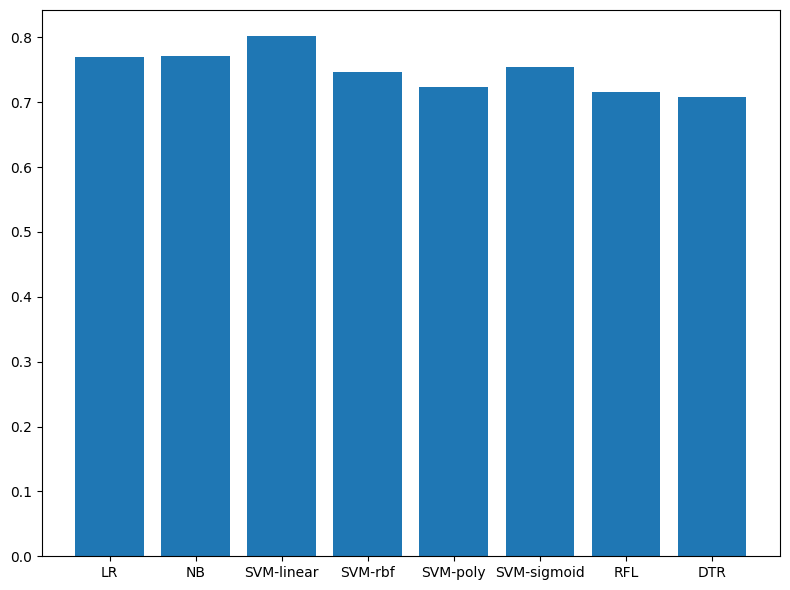

In [53]:
plt.figure(figsize=(8,6))
plt.bar(results_df["Model"], results_df["F1"])
plt.tight_layout()
plt.show()

# So our Naive Bayes Model Wins as NB represents it

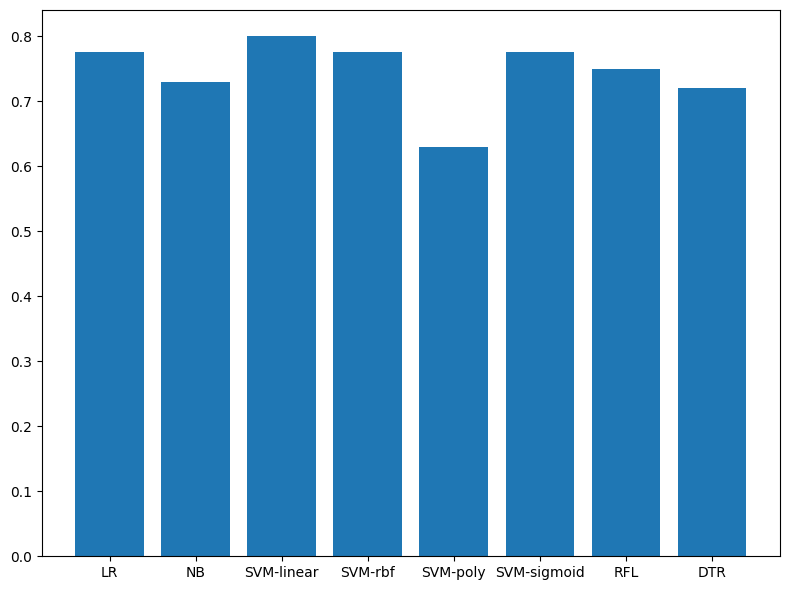

In [54]:
plt.figure(figsize=(8,6))
plt.bar(results_df["Model"], results_df["Acc"])
plt.tight_layout()
plt.show()

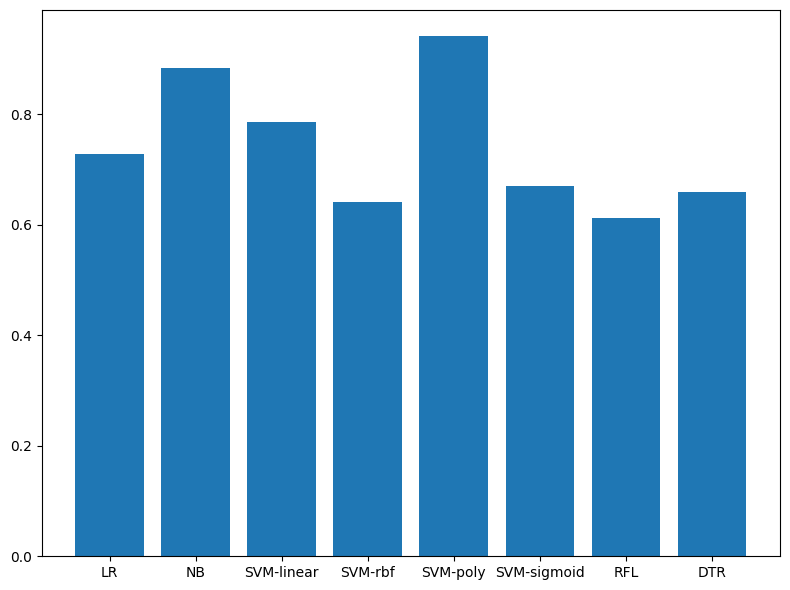

In [55]:
plt.figure(figsize=(8,6))
plt.bar(results_df["Model"], results_df["Recall"])
plt.tight_layout()
plt.show()